In [1]:
# General Use
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 3D Visualization 
import plotly as py
import plotly.graph_objs as go
import plotly.offline as pyo

#bd
from sqlalchemy import create_engine

In [2]:
from sqlalchemy import create_engine

# Cambia los valores según tu configuración de PostgreSQL
DB_USER = 'postgres'
DB_PASSWORD = '34353435'
DB_HOST = 'localhost'
DB_PORT = '5432'
DB_NAME = 'supermercado'

# Crear la cadena de conexión
connection_string = f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}'

# Crear el motor de la base de datosgoo
engine = create_engine(connection_string)

In [3]:
df = pd.read_sql("SELECT DV.subtotal, P.producto, DV.cod_producto, SUM(DV.cantidad) as total_cantidad FROM detalle_venta DV JOIN Venta V ON DV.cod_detalleventa = V.cod_venta JOIN producto P ON P.cod_producto = DV.cod_producto GROUP BY DV.cod_producto, DV.subtotal, P.producto;", con= engine)
df.head(10) 

,subtotal,producto,cod_producto,total_cantidad
0,15.09,Producto23,23,7
1,41.35,Producto15,15,9
2,86.77,Producto44,44,4
3,91.50,Producto53,53,1
4,4.58,Producto60,60,8
5,4.32,Producto45,45,10
6,31.33,Producto72,72,4
7,27.00,Producto84,84,10
8,21.95,Producto52,52,7
9,68.02,Producto1,1,2


In [4]:
df.describe()

,subtotal,cod_producto,total_cantidad
count,67.000000,67.000000,67.000000
mean,47.144030,47.626866,5.940299
std,29.005485,29.993351,3.098781
min,0.150000,1.000000,1.000000
25%,21.645000,23.000000,3.000000
50%,44.830000,46.000000,7.000000
75%,73.440000,72.500000,9.000000
max,95.730000,100.000000,10.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   subtotal        67 non-null     float64
 1   producto        67 non-null     object 
 2   cod_producto    67 non-null     int64  
 3   total_cantidad  67 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 2.2+ KB


In [6]:
df.drop(columns=['producto'], inplace=True)


C:\Users\Miguel\AppData\Local\Temp\ipykernel_3392\3202538147.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='cod_producto', ylabel='Density'>

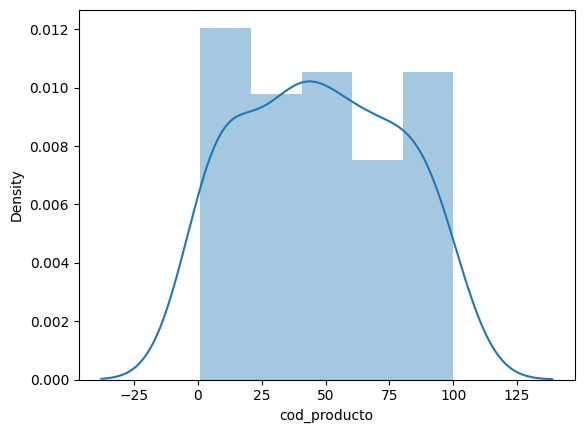

In [7]:
sns.distplot(df["cod_producto"])

C:\Users\Miguel\AppData\Local\Temp\ipykernel_3392\1075672258.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='subtotal', ylabel='Density'>

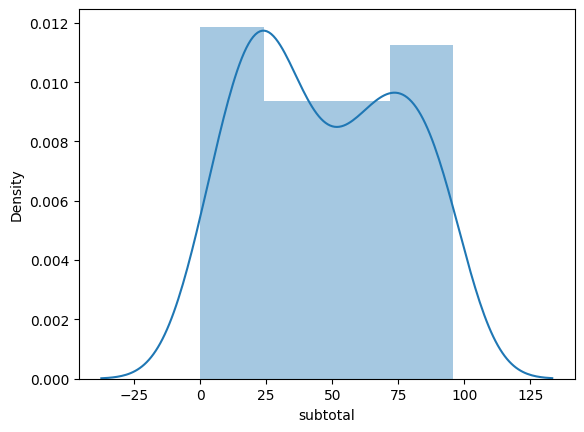

In [8]:
sns.distplot(df["subtotal"])

C:\Users\Miguel\AppData\Local\Temp\ipykernel_3392\3872453794.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='total_cantidad', ylabel='Density'>

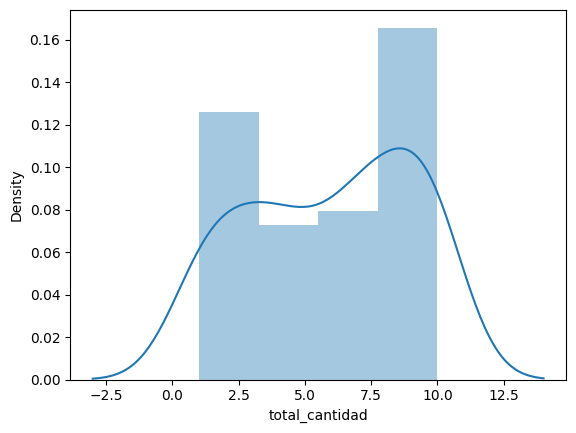

In [9]:
sns.distplot(df["total_cantidad"])

In [10]:
# kmeans clustering
df1 = df[["total_cantidad", "subtotal"]]

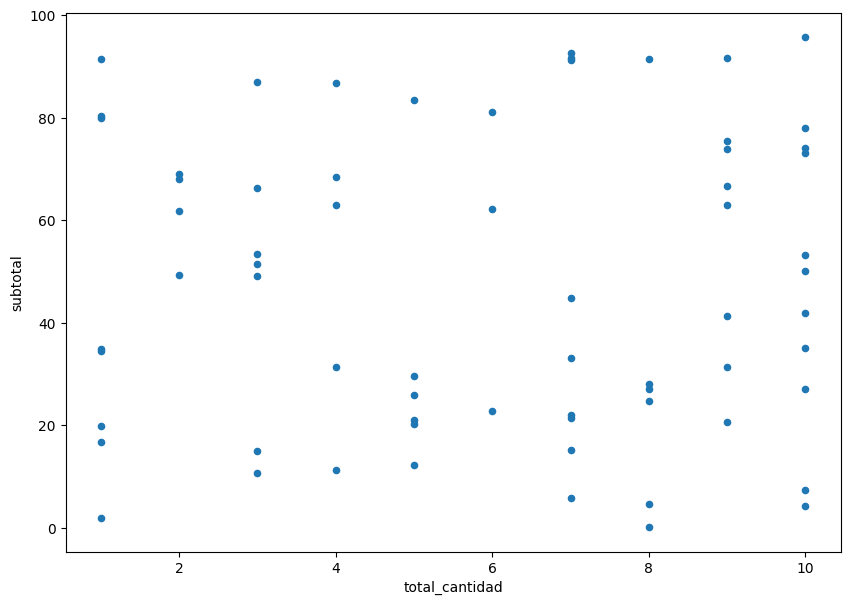

In [11]:
df1.plot(kind="scatter",
        x="total_cantidad",
        y="subtotal",
        figsize=(10, 7))
plt.show()

In [12]:
sum_of_sqr_dist = {}

for k in range(1, 10):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km = km.fit(df1)
    sum_of_sqr_dist[k] = km.inertia_

C:\Users\Miguel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Miguel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Miguel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Miguel\AppData\Local\Packages\Pyth

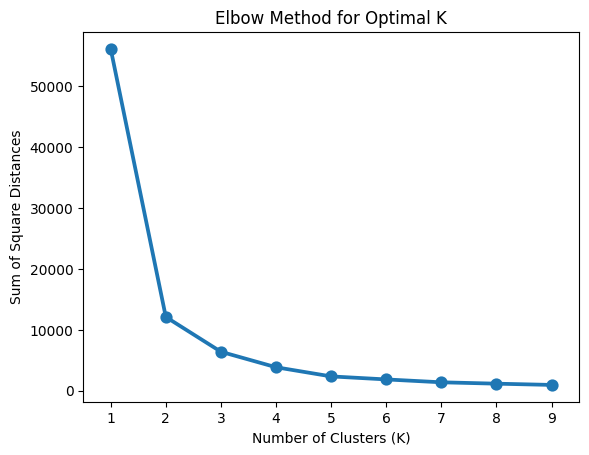

In [13]:
sns.pointplot(x=list(sum_of_sqr_dist.keys()), y=list(sum_of_sqr_dist.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Distances")
plt.title("Elbow Method for Optimal K")
plt.show()

In [14]:
# kmeans clustering
Model = KMeans(n_clusters=5,
             init='k-means++',
             max_iter=1000)
Model.fit(df1)

C:\Users\Miguel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(max_iter=1000, n_clusters=5)

In [15]:
print("Labels", Model.labels_)

Labels [0 4 3 3 0 0 2 2 2 1 2 1 1 2 2 0 1 4 2 1 4 3 2 2 3 0 1 2 3 0 1 1 4 0 2 1 1
 4 4 3 0 3 4 3 0 0 1 3 4 2 3 2 3 1 3 2 1 2 3 2 2 1 2 4 0 0 2]


In [16]:
print("Centroids", Model.cluster_centers_)

Centroids [[ 5.58333333  8.79083333]
 [ 6.35714286 68.79571429]
 [ 6.10526316 26.86894737]
 [ 5.30769231 88.05153846]
 [ 6.33333333 48.31555556]]


In [17]:
centroids = Model.cluster_centers_

In [18]:
df1_cluster = df1.copy()
df1_cluster["Cluster"] = Model.fit_predict(df1)

C:\Users\Miguel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [19]:
df1_cluster.head()

,total_cantidad,subtotal,Cluster
0,7,15.09,4
1,9,41.35,3
2,4,86.77,0
3,1,91.50,0
4,8,4.58,4


In [20]:
Color = ['red', 'blue', 'black', 'gold', 'navy']
df1_cluster['Color'] = df1_cluster['Cluster'].map(lambda p:Color[p])

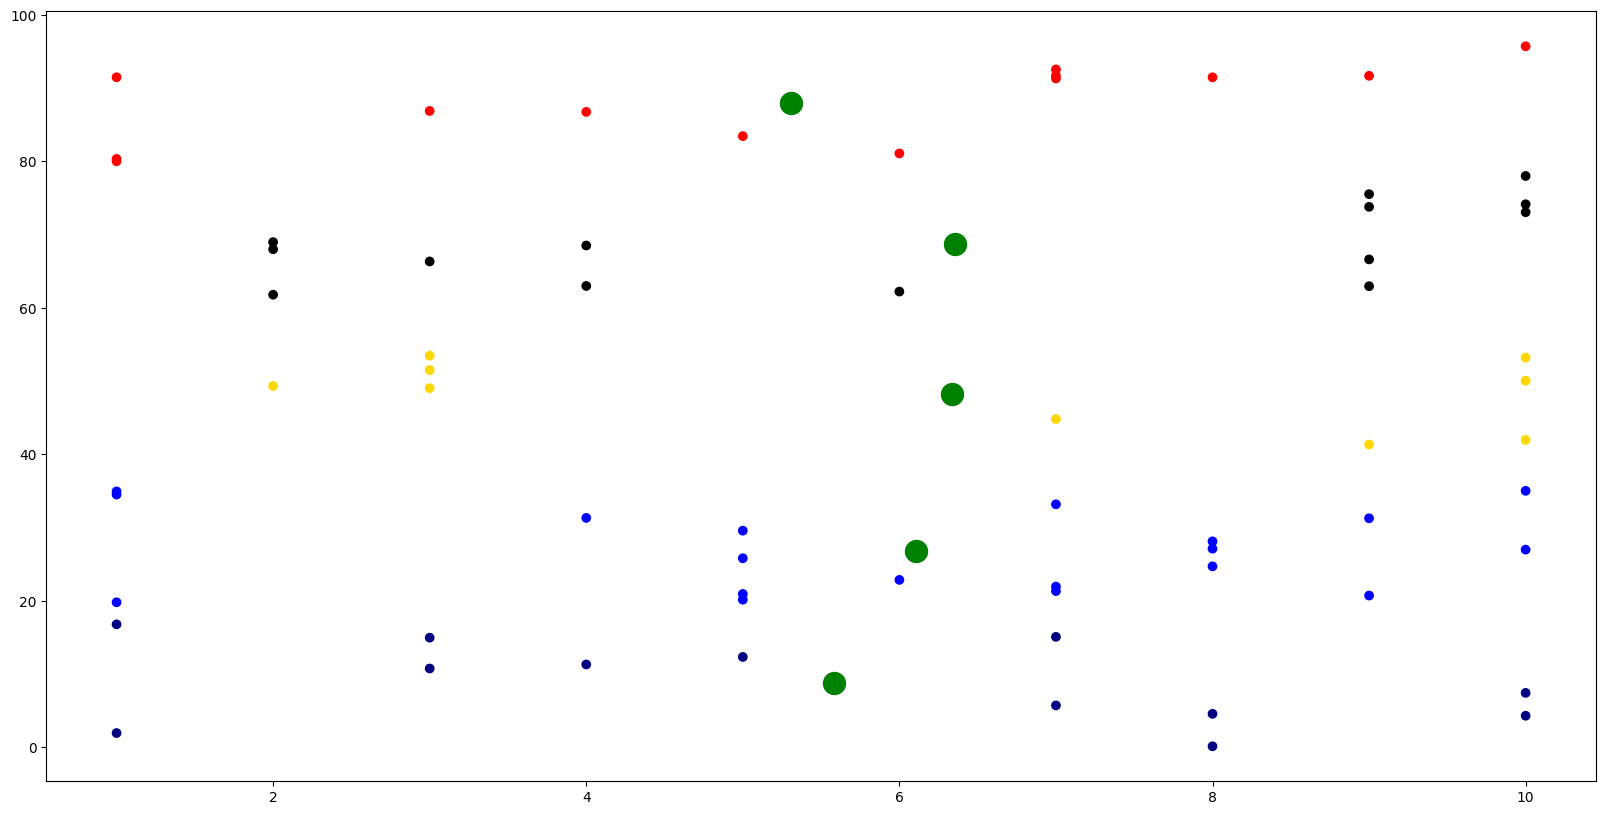

In [21]:
plt.figure(figsize=(20, 10))
plt.scatter(df1["total_cantidad"],
           df1["subtotal"],
           c=df1_cluster["Color"])

plt.scatter(centroids[:, 0], centroids[:, 1], c='green', s=250)
plt.show()

In [22]:
labels = Model.labels_


In [23]:
silhouette_score(df1, labels)

0.5281880463610958

In [24]:
silhouette = {}

for k in range(2,8):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km.fit(df1)
    silhouette[k] = silhouette_score(df1, km.labels_)

C:\Users\Miguel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Miguel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Miguel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Miguel\AppData\Local\Packages\Pyth

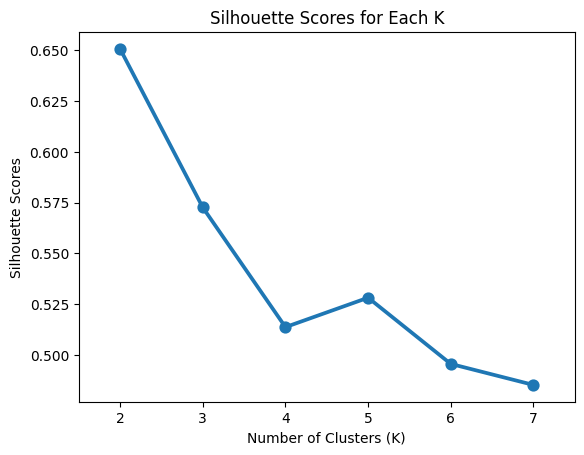

In [25]:
sns.pointplot(x=list(silhouette.keys()), y=list(silhouette.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Scores")
plt.title("Silhouette Scores for Each K")
plt.show()

In [26]:
df2= df.copy()

In [27]:
sum_of_sqr_dist = {}

for k in range(1, 10):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km = km.fit(df2)
    sum_of_sqr_dist[k] = km.inertia_

C:\Users\Miguel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Miguel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Miguel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Miguel\AppData\Local\Packages\Pyth

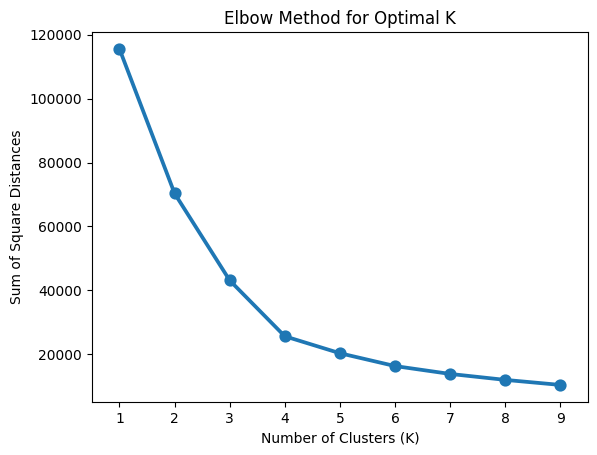

In [28]:
sns.pointplot(x=list(sum_of_sqr_dist.keys()), y=list(sum_of_sqr_dist.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Distances")
plt.title("Elbow Method for Optimal K")
plt.show()

In [29]:
Model2 = KMeans(n_clusters=6, init='k-means++', max_iter=1000)
Model2.fit(df2)

C:\Users\Miguel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(max_iter=1000, n_clusters=6)

In [30]:
df2['Cluster'] = Model2.fit_predict(df2)
df2.head()

C:\Users\Miguel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,subtotal,cod_producto,total_cantidad,Cluster
0,15.09,23,7,4
1,41.35,15,9,4
2,86.77,44,4,3
3,91.50,53,1,3
4,4.58,60,8,0


In [31]:
# 3d visualization
labels = Model2.labels_
centroids = Model2.cluster_centers_

In [32]:
df2['labels'] = labels

trace = go.Scatter3d(
                    x = df2['cod_producto'],
                    y = df2['total_cantidad'],
                    z = df2['subtotal'],
                    mode = 'markers',
                    marker=dict(color=df2['labels'], size = 5, line=dict(color=df2['labels'], width=12), opacity=0.8)
                    )
    
data = [trace]
layout = go.Layout(
                    title='Clusters',
                    scene= dict(
                                xaxis = dict(title = 'cod_producto'),
                                yaxis = dict(title = 'total_cantidad'),
                                zaxis = dict(title = 'subtotal'))
                                )

fig = go.Figure(data=data, layout=layout)
pyo.offline.iplot(fig)
plt.show()